<a href="https://colab.research.google.com/github/kush-com/Chandrayaan-.img-OHRC-image-enhancement/blob/main/DIP_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

### Project outline
1. Preprocessing and noise reduction
  - convert to grayscale image
  - Wiener Filters (Reduce randomised noise), median filtering, Gaussian filters
  - Multiframe stacking
2. Contrast Enhancement
  - Adoptive Histogram Equalization
  - Dynamic range compression (adjusts pixel values in displayable range)
3. Feature specific enhancement
  - Use GLCM for texture analysis
  - Edge detection algorithm
  - Anisotropic diffusion filtering (Smooths out noise without blurring edges)
4. Spatial domain Filtering
  - Masking (Original img- blurred img)
5. Frequency domain filtering
  - Frequency domain filtering (FFT or wavelet transform)

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)


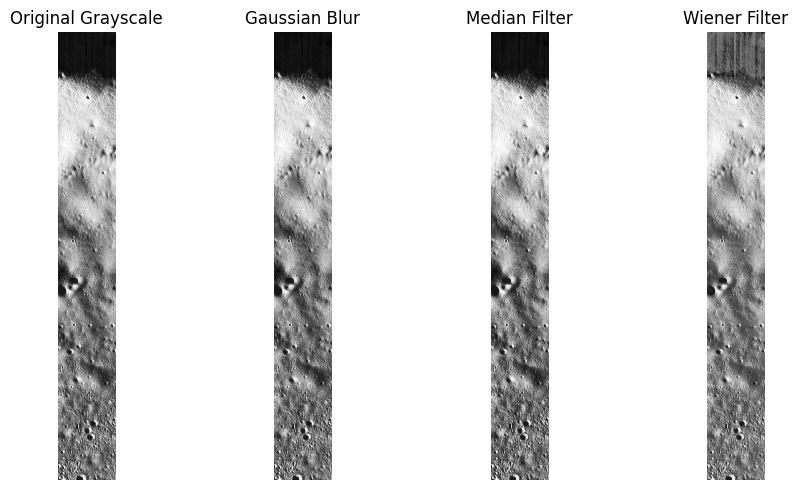

In [ ]:
import cv2
import numpy as np
from scipy.signal import wiener
from matplotlib import pyplot as plt

# Load image in grayscale
gray_image = cv2.imread('/content/ch2_ohr_ncp_20200229T0739312111_b_brw_d18.png', cv2.IMREAD_GRAYSCALE)

# 1. Gaussian Blur (reduces Gaussian noise)
gaussian_blur = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 2. Median Filter (good for salt-and-pepper noise)
median_filtered = cv2.medianBlur(gray_image, 5)

# 3. Wiener Filter (adaptive noise reduction)
# Wiener works on numpy arrays
wiener_filtered = wiener(gray_image)

# Convert back to uint8 for viewing/saving
wiener_filtered = np.uint8(np.clip(wiener_filtered, 0, 255))

# Save results
cv2.imwrite('gray_image.png', gray_image)
cv2.imwrite('gaussian_blur.png', gaussian_blur)
cv2.imwrite('median_filtered.png', median_filtered)
cv2.imwrite('wiener_filtered.png', wiener_filtered)

# Optional: display results
titles = ['Original Grayscale', 'Gaussian Blur', 'Median Filter', 'Wiener Filter']
images = [gray_image, gaussian_blur, median_filtered, wiener_filtered]

plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

<ipython-input-4-b93903d80dd2>:24: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(image))
<ipython-input-4-b93903d80dd2>:24: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(image))


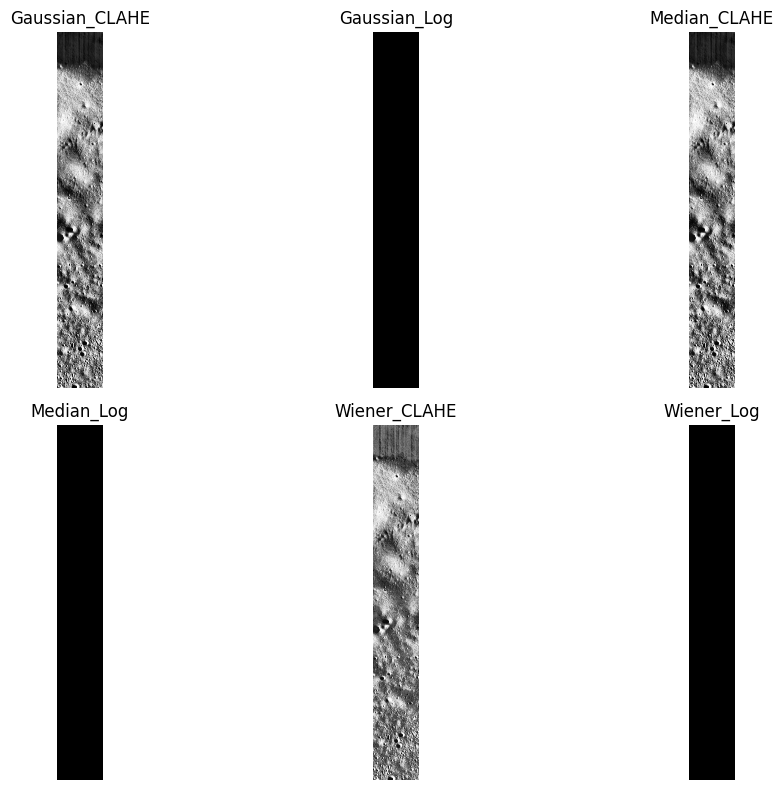

In [ ]:
import cv2
import numpy as np
from scipy.signal import wiener
from matplotlib import pyplot as plt

# Load grayscale image
gray_image = cv2.imread('/content/ch2_ohr_ncp_20200229T0739312111_b_brw_d18.png', cv2.IMREAD_GRAYSCALE)

# Noise Reduction Techniques
gaussian = cv2.GaussianBlur(gray_image, (5, 5), 0)
median = cv2.medianBlur(gray_image, 5)
wiener_img = wiener(gray_image)
wiener_img = np.uint8(np.clip(wiener_img, 0, 255))

# ---------------------------
# Contrast Enhancement Setup
# ---------------------------
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

def apply_clahe(image):
    return clahe.apply(image)

def apply_log_transform(image):
    c = 255 / np.log(1 + np.max(image))
    log_image = c * np.log(1 + image.astype(np.float64))
    return np.uint8(np.clip(log_image, 0, 255))

# Process Each Filtered Image
results = {}
for name, img in [('Gaussian', gaussian), ('Median', median), ('Wiener', wiener_img)]:
    clahe_img = apply_clahe(img)
    log_img = apply_log_transform(img)
    results[f'{name}_CLAHE'] = clahe_img
    results[f'{name}_Log'] = log_img

# Save all processed images
cv2.imwrite('gray_image.png', gray_image)
cv2.imwrite('gaussian.png', gaussian)
cv2.imwrite('median.png', median)
cv2.imwrite('wiener.png', wiener_img)

for key, img in results.items():
    cv2.imwrite(f"{key.lower()}.png", img)

# Optional: Display images using matplotlib
plt.figure(figsize=(12, 8))
titles = ['Gaussian_CLAHE', 'Gaussian_Log', 'Median_CLAHE', 'Median_Log', 'Wiener_CLAHE', 'Wiener_Log']
for i, key in enumerate(titles):
    plt.subplot(2, 3, i+1)
    plt.imshow(results[key], cmap='gray')
    plt.title(key)
    plt.axis('off')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)
<ipython-input-6-b4252a6e4ab6>:6: RuntimeWarning: invalid value encountered in cast
  wiener_filtered = np.uint8(np.clip(wiener_filtered, 0, 255))  # Ensure valid pixel range


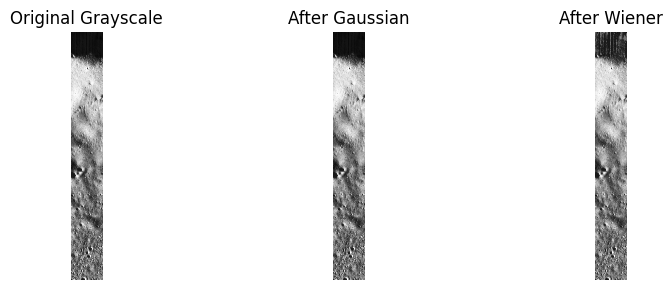

In [ ]:
# Step 2: Apply Gaussian Blur
gaussian_filtered = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Step 3: Apply Wiener Filter on Gaussian output
wiener_filtered = wiener(gaussian_filtered)
wiener_filtered = np.uint8(np.clip(wiener_filtered, 0, 255))  # Ensure valid pixel range

# Save and display
cv2.imwrite("gaussian_then_wiener.png", wiener_filtered)

# Optional: Show all stages
titles = ['Original Grayscale', 'After Gaussian', 'After Wiener']
images = [gray_image, gaussian_filtered, wiener_filtered]

plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

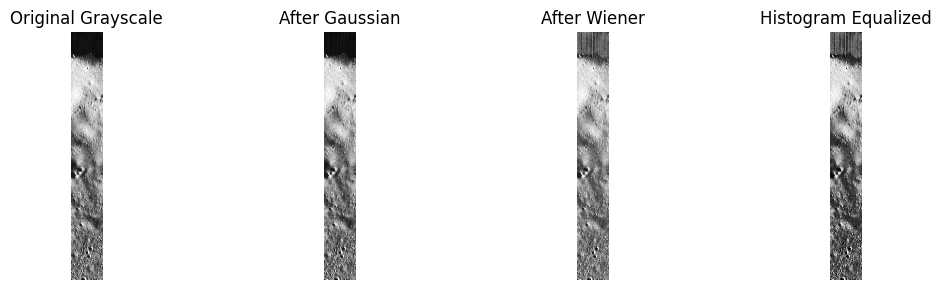

In [ ]:
# Step 4: Apply Histogram Equalization
hist_equalized = cv2.equalizeHist(wiener_filtered)
gaussian_filtered = cv2.GaussianBlur(gray_image, (5, 5), 0)
# Save the final result
cv2.imwrite("gaussian_then_wiener_then_hist_equalized.png", hist_equalized)

# Display all stages
titles = ['Original Grayscale', 'After Gaussian', 'After Wiener', 'Histogram Equalized']
images = [gray_image, gaussian_filtered, wiener_filtered, hist_equalized]

plt.figure(figsize=(12, 3))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

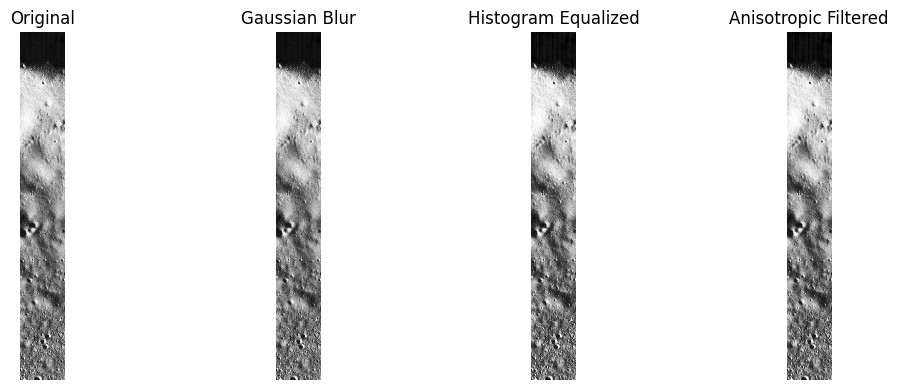

In [ ]:
import matplotlib.pyplot as plt
from skimage.restoration import denoise_tv_chambolle
gaussian_filtered = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Step 3: Histogram Equalization
hist_equalized = cv2.equalizeHist(gaussian_filtered)

# Step 4: Anisotropic Diffusion (TV Denoising)
# Convert to float in range [0, 1] for skimage
hist_equalized_norm = hist_equalized / 255.0
anisotropic_filtered = denoise_tv_chambolle(hist_equalized_norm, weight=0.1)

# Convert back to uint8
anisotropic_filtered_uint8 = np.uint8(anisotropic_filtered * 255)

# Save the final image
cv2.imwrite('final_anisotropic_filtered.png', anisotropic_filtered_uint8)

# Display steps
titles = ['Original', 'Gaussian Blur', 'Histogram Equalized', 'Anisotropic Filtered']
images = [gray_image, gaussian_filtered, hist_equalized, anisotropic_filtered_uint8]

plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)


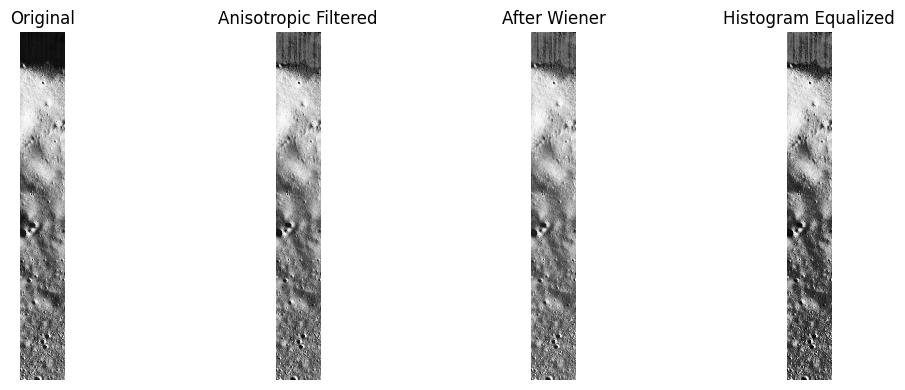

In [ ]:
# Step 3: Wiener Filter
wiener_filtered = wiener(gray_image)
wiener_filtered = np.uint8(np.clip(wiener_filtered, 0, 255))

# Step 2: Anisotropic Diffusion (TV Denoising)
tv_denoised = denoise_tv_chambolle( wiener_filtered/ 255.0, weight=0.1)
tv_denoised_uint8 = np.uint8(tv_denoised * 255)

# Step 4: Histogram Equalization
hist_equalized = cv2.equalizeHist(wiener_filtered)

# Save final image
cv2.imwrite('anisotropic_then_wiener_then_hist.png', hist_equalized)

# Display steps
titles = ['Original', 'Anisotropic Filtered', 'After Wiener', 'Histogram Equalized']
images = [gray_image, tv_denoised_uint8, wiener_filtered, hist_equalized]

plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.9 MB/s eta 0:00:00


In [ ]:
import pywt
import pywt.data
from scipy.signal import wiener

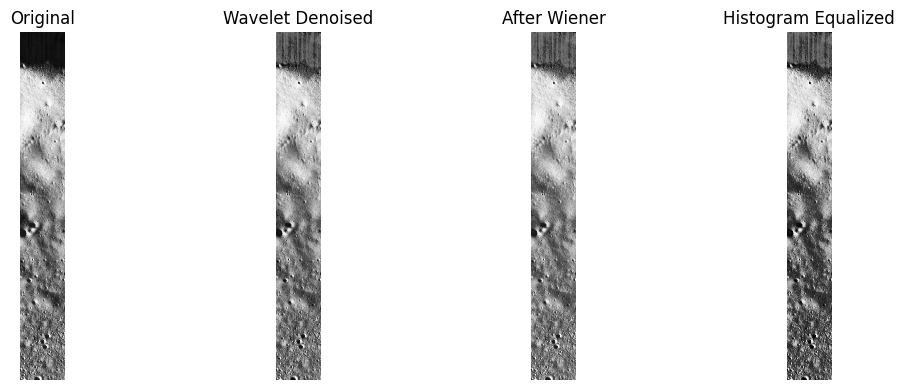

In [ ]:
# Step 2: Wavelet Denoising (using PyWavelets)
def wavelet_denoising(image, wavelet='haar', level=1, threshold=0.1):
    coeffs = pywt.wavedec2(image, wavelet, level=level)
    coeffs_thresholded = []

    # Apply thresholding to the details
    for coeff in coeffs:
        if isinstance(coeff, tuple):
            cH, cV, cD = coeff
            coeffs_thresholded.append((pywt.threshold(cH, threshold, mode='soft'),
                                       pywt.threshold(cV, threshold, mode='soft'),
                                       pywt.threshold(cD, threshold, mode='soft')))
        else:
            coeffs_thresholded.append(pywt.threshold(coeff, threshold, mode='soft'))

    # Reconstruct the image from the thresholded coefficients
    denoised_image = pywt.waverec2(coeffs_thresholded, wavelet)
    return np.uint8(np.clip(denoised_image, 0, 255))


wiener_filtered = wiener(gray_image)
wiener_filtered = np.uint8(np.clip(wiener_filtered, 0, 255))

# Step 2: Anisotropic Diffusion (TV Denoising)
tv_denoised = denoise_tv_chambolle( wiener_filtered/ 255.0, weight=0.1)
tv_denoised_uint8 = np.uint8(tv_denoised * 255)

# Apply wavelet denoising to the grayscale image
denoised_image = wavelet_denoising(tv_denoised_uint8)


# Step 4: Histogram Equalization
hist_equalized = cv2.equalizeHist(wiener_filtered)

# Save final result
cv2.imwrite('wavelet_then_wiener_then_hist.png', hist_equalized)

# Display all steps
titles = ['Original', 'Wavelet Denoised', 'After Wiener', 'Histogram Equalized']
images = [gray_image, denoised_image, wiener_filtered, hist_equalized]

plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)


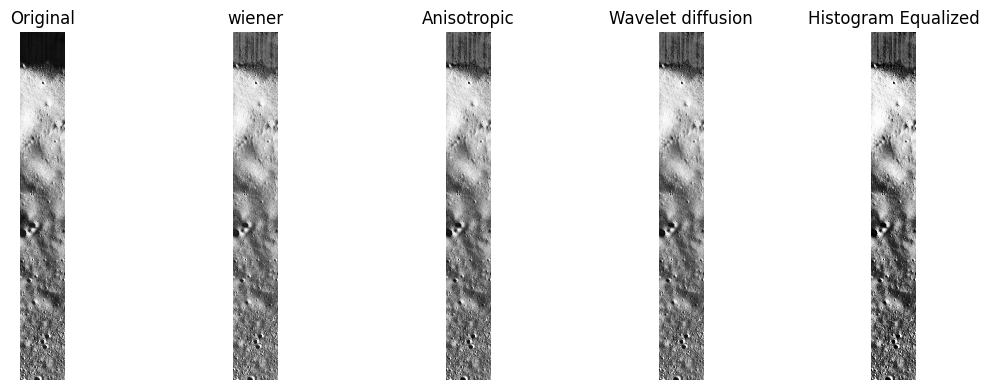

In [ ]:
# Step 3: Wiener Filter
wiener_filtered = wiener(gray_image)
wiener_filtered = np.uint8(np.clip(wiener_filtered, 0, 255))

# Step 2: Anisotropic Diffusion (TV Denoising)
tv_denoised = denoise_tv_chambolle( wiener_filtered/ 255.0, weight=0.1)
tv_denoised_uint8 = np.uint8(tv_denoised * 255)

# Apply wavelet denoising to the grayscale image
denoised_image = wavelet_denoising(tv_denoised_uint8)

# Step 4: Histogram Equalization
hist_equalized = cv2.equalizeHist(denoised_image)

# Save final result
cv2.imwrite('wiener_then_denoised_then_wavelet_then_hist.png', hist_equalized)

# Display all steps
titles = ['Original', 'wiener', 'Anisotropic', 'Wavelet diffusion','Histogram Equalized']
images = [gray_image, wiener_filtered, tv_denoised_uint8,denoised_image,hist_equalized]

plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

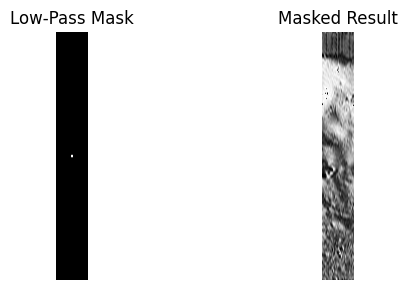

(None, None)

In [ ]:
# FFT and shift
f = np.fft.fft2(hist_equalized)
fshift = np.fft.fftshift(f)

# Create circular low-pass mask
rows, cols = hist_equalized.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), 50, 1, thickness=-1)

# Apply the mask
fshift_masked = fshift * mask

# Inverse FFT
f_ishift = np.fft.ifftshift(fshift_masked)
img_back = np.abs(np.fft.ifft2(f_ishift)).astype(np.uint8)

# Visualize
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1), plt.imshow(mask*255, cmap='gray'), plt.title('Low-Pass Mask')
plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(img_back, cmap='gray'), plt.title('Masked Result')
plt.axis('off')
plt.tight_layout(), plt.show()


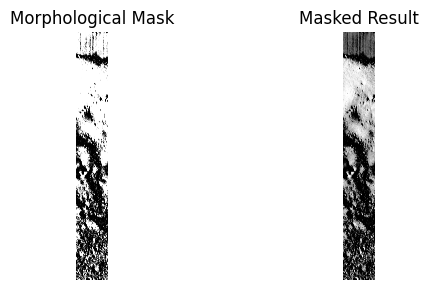

(None, None)

In [ ]:
# Convert histogram equalized image to binary mask
_, binary_mask = cv2.threshold(hist_equalized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply morphological operations
kernel = np.ones((5, 5), np.uint8)
dilated_mask = cv2.dilate(binary_mask, kernel, iterations=1)
eroded_mask = cv2.erode(dilated_mask, kernel, iterations=1)

# Use the refined mask
morph_masked = cv2.bitwise_and(hist_equalized, hist_equalized, mask=eroded_mask)

# Visualize
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1), plt.imshow(eroded_mask, cmap='gray'), plt.title('Morphological Mask')
plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(morph_masked, cmap='gray'), plt.title('Masked Result')
plt.axis('off')
plt.tight_layout(), plt.show()


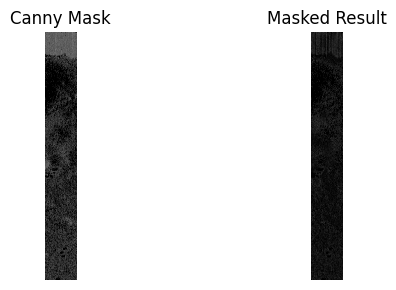

(None, None)

In [ ]:
# Step 5: Canny Edge Detection for Masking
edges = cv2.Canny(hist_equalized, threshold1=50, threshold2=150)

# Use the edges as a mask
masked_canny = cv2.bitwise_and(hist_equalized, hist_equalized, mask=edges)

# Visualize
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1), plt.imshow(edges, cmap='gray'), plt.title('Canny Mask')
plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(masked_canny, cmap='gray'), plt.title('Masked Result')
plt.axis('off')
plt.tight_layout(), plt.show()


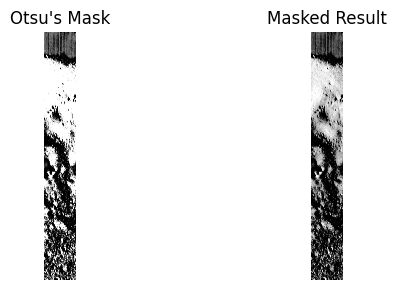

(None, None)

In [ ]:
# Otsu’s Threshold to create a binary mask
_, otsu_mask = cv2.threshold(hist_equalized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply the mask
otsu_masked = cv2.bitwise_and(hist_equalized, hist_equalized, mask=otsu_mask)

# Visualize
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1), plt.imshow(otsu_mask, cmap='gray'), plt.title("Otsu's Mask")
plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(otsu_masked, cmap='gray'), plt.title('Masked Result')
plt.axis('off')
plt.tight_layout(), plt.show()


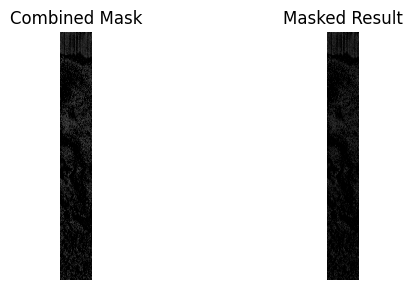

(None, None)

In [ ]:
# Canny + Otsu combined mask
combined_mask = cv2.bitwise_and(edges, otsu_mask)
combined_result = cv2.bitwise_and(hist_equalized, hist_equalized, mask=combined_mask)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1), plt.imshow(combined_mask, cmap='gray'), plt.title('Combined Mask')
plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(combined_result, cmap='gray'), plt.title('Masked Result')
plt.axis('off')
plt.tight_layout(), plt.show()


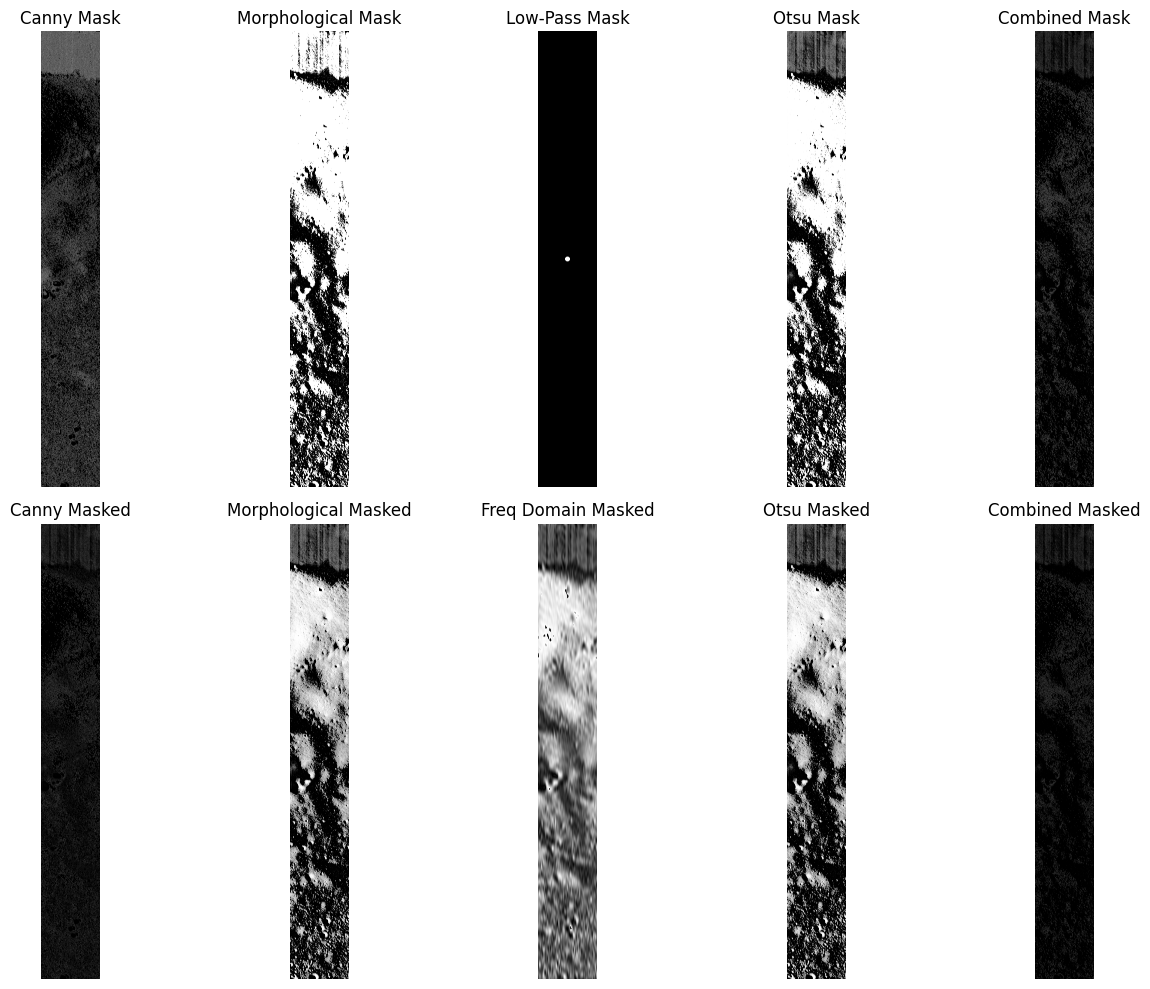

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_masking_techniques(image):
    masks = {}
    results = {}

    # 1. Canny Edge Masking
    canny_mask = cv2.Canny(image, 50, 150)
    masks["Canny Mask"] = canny_mask
    results["Canny Masked"] = cv2.bitwise_and(image, image, mask=canny_mask)

    # 2. Morphological Masking
    _, binary_mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((5, 5), np.uint8)
    morph_mask = cv2.erode(cv2.dilate(binary_mask, kernel, iterations=1), kernel, iterations=1)
    masks["Morphological Mask"] = morph_mask
    results["Morphological Masked"] = cv2.bitwise_and(image, image, mask=morph_mask)

    # 3. Frequency Domain Masking (Low-Pass Filter)
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    freq_mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(freq_mask, (ccol, crow), 50, 1, -1)
    fshift_masked = fshift * freq_mask
    f_ishift = np.fft.ifftshift(fshift_masked)
    freq_filtered = np.abs(np.fft.ifft2(f_ishift)).astype(np.uint8)
    masks["Low-Pass Mask"] = freq_mask * 255
    results["Freq Domain Masked"] = freq_filtered

    # 4. Otsu’s Threshold Mask
    _, otsu_mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    masks["Otsu Mask"] = otsu_mask
    results["Otsu Masked"] = cv2.bitwise_and(image, image, mask=otsu_mask)

    # 5. Combined Mask (Canny + Otsu)
    combined_mask = cv2.bitwise_and(canny_mask, otsu_mask)
    masks["Combined Mask"] = combined_mask
    results["Combined Masked"] = cv2.bitwise_and(image, image, mask=combined_mask)

    return masks, results


# --- RUN IT ---
masks, masked_outputs = apply_masking_techniques(hist_equalized)

# --- VISUALIZE ---
plt.figure(figsize=(14, 10))
for idx, (name, mask) in enumerate(masks.items()):
    plt.subplot(2, len(masks), idx + 1)
    plt.imshow(mask, cmap='gray')
    plt.title(name)
    plt.axis('off')

for idx, (name, result) in enumerate(masked_outputs.items()):
    plt.subplot(2, len(masked_outputs), idx + 1 + len(masked_outputs))
    plt.imshow(result, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()


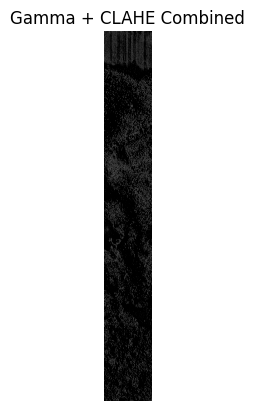

In [ ]:
def gamma_correction(image, gamma=1.5):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in range(256)]).astype('uint8')
    return cv2.LUT(image, table)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(combined_mask)
gamma_then_clahe = gamma_correction(clahe_img, gamma=2.2)

plt.imshow(gamma_then_clahe, cmap='gray')
plt.title("Gamma + CLAHE Combined")
plt.axis('off')
plt.show()


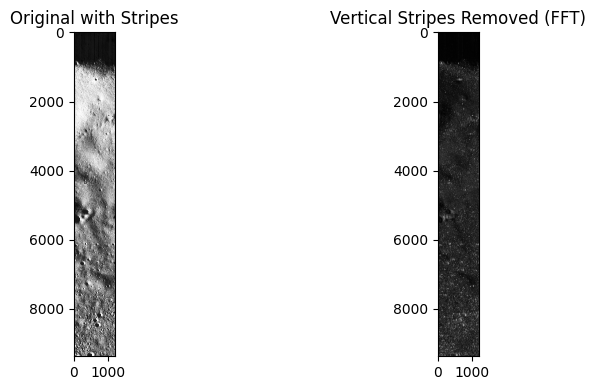

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_vertical_stripes_fft(image):
    # FFT
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    # Create a notch filter to suppress vertical frequency components
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[:, ccol-5:ccol+5] = 0  # Zero out vertical line frequencies

    # Apply notch mask and inverse FFT
    fshift_filtered = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return np.uint8(np.clip(img_back, 0, 255))

stripeless_img = remove_vertical_stripes_fft(gray_image)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.imshow(gray_image, cmap='gray'), plt.title("Original with Stripes")
plt.subplot(1,2,2), plt.imshow(stripeless_img, cmap='gray'), plt.title("Vertical Stripes Removed (FFT)")
plt.tight_layout()
plt.show()


In [ ]:
# Install required libraries
!pip install -q plotly opencv-python

import cv2
import numpy as np
import plotly.graph_objects as go
from PIL import Image
from google.colab import files
import io

In [ ]:
# Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]
img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Saving ch2_ohr_ncp_20200229T0739312111_b_brw_d18.png to ch2_ohr_ncp_20200229T0739312111_b_brw_d18 (1).png


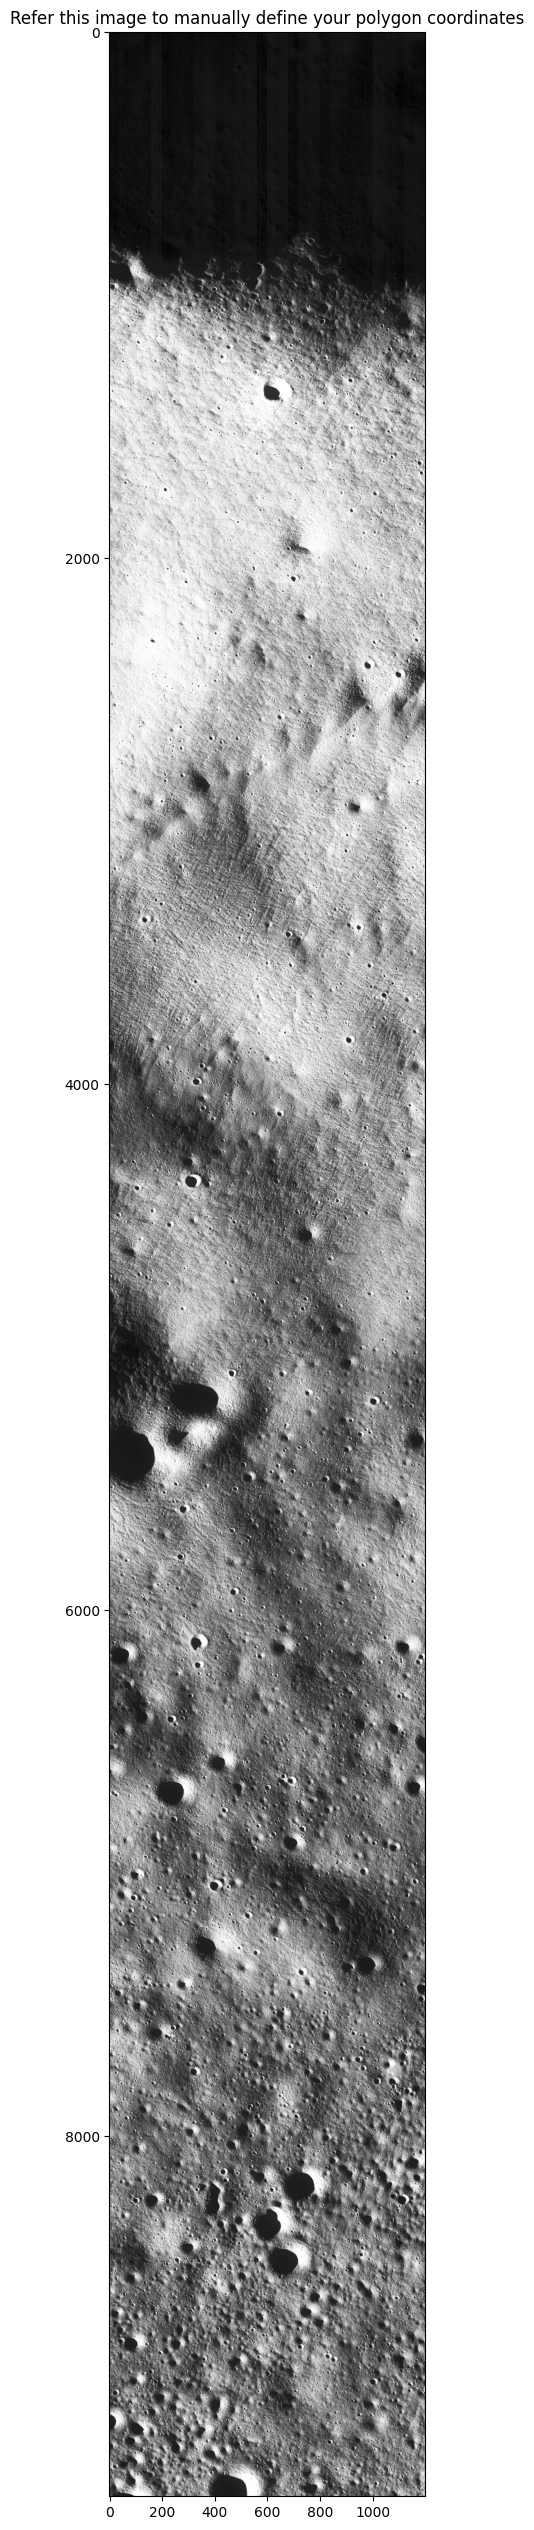

In [ ]:
# Show image in Plotly and capture clicks
from IPython.display import display
import plotly.express as px

plt.figure(figsize=(32, 32))
plt.imshow(img_rgb)
plt.title("Refer this image to manually define your polygon coordinates")
plt.axis('on')
plt.show()


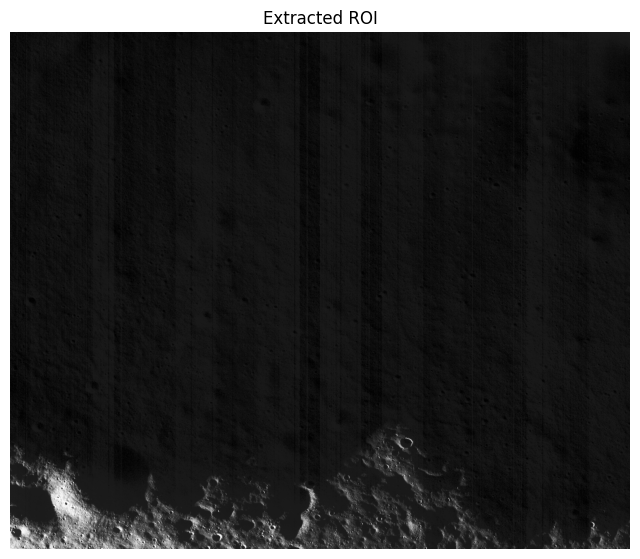

In [ ]:
# Step 3: Manually define polygon points (x, y)
# Example: Around a random shape on the image
# Replace with your actual clicked/guessed values from above

points = [(0, 0), (8000, 1200)]

# Step 4: Create mask and extract ROI
mask = np.zeros(img.shape[:2], dtype=np.uint8)
pts = np.array(points, dtype=np.int32)
cv2.fillPoly(mask, [pts], 255)

roi = img_rgb[0:1000,0:1200]

# # Optional: Make background transparent
roi_rgba = cv2.cvtColor(roi, cv2.COLOR_BGR2BGRA)
# roi_rgba[mask == 0] = [0, 0, 0, 0]

# Show the result
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(roi_rgba, cv2.COLOR_BGRA2RGBA))
plt.title("Extracted ROI")
plt.axis('off')
plt.show()


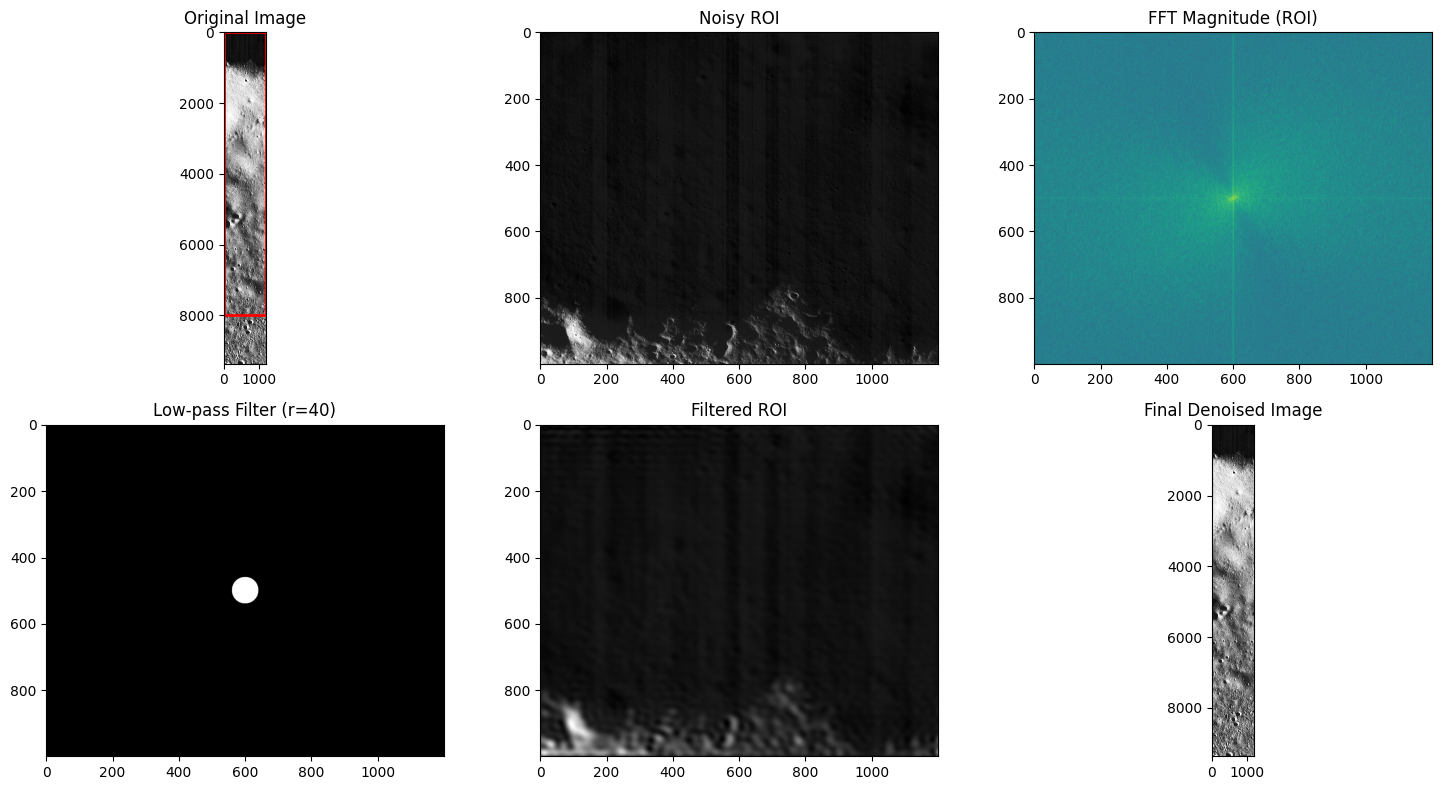

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle

def selective_fft_denoising(image_path, region_coords, filter_radius=30):
    """
    Remove noise from a specific region using FFT

    Parameters:
    - image_path: path to the grayscale image
    - region_coords: (x1, y1, x2, y2) coordinates of the noisy region
    - filter_radius: radius for low-pass filter (adjust based on noise)
    """
    x1 = 0
    y1=0
    x2=1200
    y2=8000
    # 1. Load the image
    img = image_path

    # 2. Extract the region of interest (ROI)
    # Convert to grayscale
    grayscale_img_roi = cv2.cvtColor(roi_rgba, cv2.COLOR_BGR2GRAY)
    roi = grayscale_img_roi

    # 3. Compute FFT of the ROI
    fft_roi = np.fft.fft2(roi)
    fft_shifted = np.fft.fftshift(fft_roi)

    # 4. Create and apply low-pass filter
    rows, cols = roi.shape
    crow, ccol = rows//2, cols//2

    # Create circular mask
    mask = np.zeros((rows, cols), np.uint8)
    y, x = np.ogrid[:rows, :cols]
    mask_area = (x - ccol)**2 + (y - crow)**2 <= filter_radius**2
    mask[mask_area] = 1

    # Apply mask
    fft_filtered = fft_shifted * mask

    # 5. Inverse FFT
    fft_ishift = np.fft.ifftshift(fft_filtered)
    roi_filtered = np.abs(np.fft.ifft2(fft_ishift))

    # 6. Put the filtered ROI back into the original image
    img_filtered = img.copy()
    img_filtered[y1:y2, x1:x2] = roi_filtered

    # 7. Visualization
    plt.figure(figsize=(15, 8))

    # Original image with ROI marked
    plt.subplot(231)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.gca().add_patch(Rectangle((x1, y1), x2-x1, y2-y1,
                                 linewidth=2, edgecolor='r', facecolor='none'))

    # ROI before processing
    plt.subplot(232)
    plt.imshow(roi, cmap='gray')
    plt.title('Noisy ROI')

    # FFT magnitude of ROI
    plt.subplot(233)
    plt.imshow(20*np.log(np.abs(fft_shifted)+1))
    plt.title('FFT Magnitude (ROI)')

    # Filter mask
    plt.subplot(234)
    plt.imshow(mask*255, cmap='gray')
    plt.title(f'Low-pass Filter (r={filter_radius})')

    # Filtered ROI
    plt.subplot(235)
    plt.imshow(roi_filtered, cmap='gray')
    plt.title('Filtered ROI')

    # Final image
    plt.subplot(236)
    plt.imshow(img_filtered, cmap='gray')
    plt.title('Final Denoised Image')

    plt.tight_layout()
    plt.show()

    return img_filtered

# Example usage:
image_path = gray_image  # Replace with your image path
region_coords = (0, 0, 1200, 8000)  # (x1, y1, x2, y2) of noisy region
denoised_img = selective_fft_denoising(image_path, region_coords, filter_radius=40)